Calculate the yield of the 11 selected bonds (ytm). Then provide a welllabeled plot with a 5-year yield curve (ytm curve) corresponding to each day of data superimposed on-top of each other.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bond_prices = np.array([
              [99.63,99.64,99.65,99.66,99.67,99.69,99.68,99.68,99.71,99.72,99.72],
              [97.96,97.98,97.99,97.98,98.02,98.05,97.97,97.98,98,98.01,98.03],
              [96.46,96.48,96.55,96.58,96.66,96.72,96.54,96.45,96.5,96.46,96.46],
              [98.19,98.20,98.26,98.25,98.31,98.31,98.21,98.02,97.98,97.97,97.9],
              [98.27,98.28,98.37,98.35,98.43,98.44,98.3,98.05,98,97.99,97.93],
              [93.46,93.44,93.55,93.53,93.6,93.57,93.4,93.12,93.08,93.07,93],
              [93.28,93.30,93.25,93.19,93.47,93.49,93.14,92.86,92.75,92.76,92.83],
              [97.58,97.59,97.6,97.52,97.74,97.77,97.44,97.09,96.96,96.95,96.94],
              [100.5,100.48,100.44,100.33,100.64,100.67,100.22,99.83,99.66,99.62,99.67],
              [99.74,99.72,99.72,99.55,99.88,99.91,99.44,98.99,98.81,98.77,98.83],
              [103.41,103.38,103.28,103.13,103.54,103.55,102.97,102.48,102.28,102.24,102.41]
              ]).transpose()  # each row is a day's price
terms = [1/6 + i*0.5 for i in range(11)]
days = ["Jan 8", "Jan 9", "Jan 10", "Jan 11", "Jan 12", "Jan 15", "Jan 16", "Jan 17", "Jan 18", "Jan 19", "Jan 22"]
coupons = np.array([0.0225,0.015,0.0125,0.03,0.03,0.01,0.0125,0.0275,0.0350,0.0325,0.0400])

In [3]:
def YTM(present_values, coupons, terms):
  # Yield to Maturity (YTM) = [Annual Coupon + (FV – PV) ÷ Number of Compounding Periods)] ÷ [(FV + PV) ÷ 2]
  # Face value is always 100
  n_periods = np.array(terms)*2#len(present_values)
  annual_coupons = coupons * 1/2 * 100 # semi annual coupons
  ytm = (annual_coupons + (100-present_values)/n_periods) / (1/2 * (present_values+100))
  return ytm

In [4]:
ytms = []
for i, present_values in enumerate(bond_prices):
  ytm = YTM(present_values, coupons, terms)
  print(f"yields for {days[i]}: {ytm}")
  ytms.append(ytm)

yields for Jan 8: [0.02239142 0.02303496 0.02180742 0.02061658 0.01915802 0.01784607
 0.01744674 0.01725883 0.01685786 0.01655009 0.01642004]
yields for Jan 9: [0.02208976 0.0228811  0.02171795 0.02058527 0.01913378 0.01788668
 0.01741226 0.01724416 0.01688348 0.0165732  0.01645101]
yields for Jan 10: [0.02178813 0.02280418 0.02140495 0.02039746 0.0189157  0.01766339
 0.01749847 0.01722948 0.01693474 0.0165732  0.01655432]
yields for Jan 11: [0.02148653 0.0228811  0.02127087 0.02042875 0.01896415 0.01770397
 0.01760198 0.01734692 0.01707582 0.01676988 0.01670946]
yields for Jan 12: [0.02118496 0.02257348 0.02091354 0.02024104 0.01877042 0.01756198
 0.01711948 0.01702419 0.01667863 0.0163884  0.01628593]
yields for Jan 15: [0.0205819  0.02234284 0.02064573 0.02024104 0.01874622 0.01762282
 0.01708507 0.01698024 0.01664026 0.01635379 0.01627562]
yields for Jan 16: [0.02088341 0.02295802 0.02144965 0.02055396 0.0190853  0.01796794
 0.01768829 0.01746445 0.01721706 0.01689731 0.01687521]
y

<ipython-input-5-b3ced3d281d8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


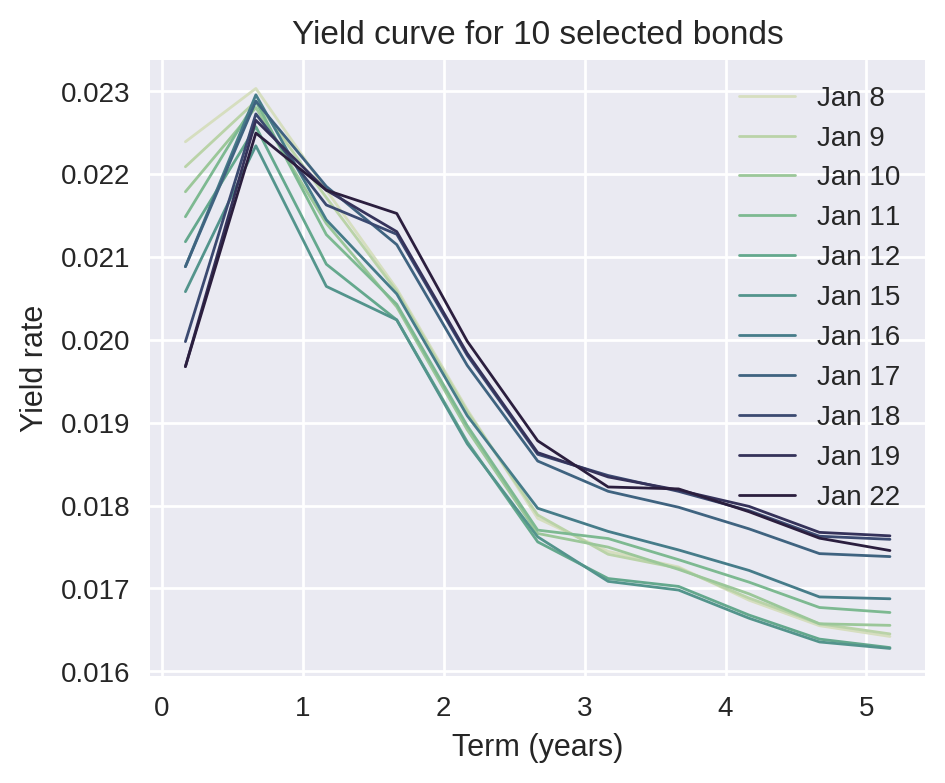

In [5]:
# plot the ytm curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
plt.style.use('seaborn')
plt.figure(figsize=(5,4), dpi=200)
for i, rates in enumerate(ytms):
    plt.plot(terms, rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Yield rate")
plt.title("Yield curve for 10 selected bonds")
plt.legend()
plt.show()

 Write a pseudo-code (explanation of an algorithm) for how you would derive the spot curve with terms ranging from 1-5 years from your chosen bonds in part 2. (Please recall the day convention simplifications provided in part 2 as well.) Then provide a well-labeled plot with a 5-year spot curve corresponding to each day of data superimposed on-top of each other

In [6]:
#!pip install sympy

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# we use this package for solving our yield curve equation simpler
from sympy import Eq, solve, exp
from sympy.abc import r
import math

In [8]:
bond_prices = np.array([
              [99.63,99.64,99.65,99.66,99.67,99.69,99.68,99.68,99.71,99.72,99.72],
              [97.96,97.98,97.99,97.98,98.02,98.05,97.97,97.98,98,98.01,98.03],
              [96.46,96.48,96.55,96.58,96.66,96.72,96.54,96.45,96.5,96.46,96.46],
              [98.19,98.20,98.26,98.25,98.31,98.31,98.21,98.02,97.98,97.97,97.9],
              [98.27,98.28,98.37,98.35,98.43,98.44,98.3,98.05,98,97.99,97.93],
              [93.46,93.44,93.55,93.53,93.6,93.57,93.4,93.12,93.08,93.07,93],
              [93.28,93.30,93.25,93.19,93.47,93.49,93.14,92.86,92.75,92.76,92.83],
              [97.58,97.59,97.6,97.52,97.74,97.77,97.44,97.09,96.96,96.95,96.94],
              [100.5,100.48,100.44,100.33,100.64,100.67,100.22,99.83,99.66,99.62,99.67],
              [99.74,99.72,99.72,99.55,99.88,99.91,99.44,98.99,98.81,98.77,98.83],
              [103.41,103.38,103.28,103.13,103.54,103.55,102.97,102.48,102.28,102.24,102.41],
              ]).transpose()  # each row is a day's price
terms = [1/6 + i*0.5 for i in range(11)]  # we simplify the term by assuming today is Jan 1st
days = ["Jan 8", "Jan 9", "Jan 10", "Jan 11", "Jan 12", "Jan 15", "Jan 16", "Jan 17", "Jan 18", "Jan 19", "Jan 22"]
coupons = np.array([0.0225,0.015,0.0125,0.03,0.03,0.01,0.0125,0.0275,0.0350,0.0325,0.0400])

In [9]:
def get_spot_rate(dirty_prices, terms, coupons, DEBUG=False):
    # always assume only the first term is zero coupon bond
    rates = []
    for i, t in enumerate(terms):
      dp = dirty_prices[i]
      coup = coupons[i]
      coupon_payment = coup*100*0.5
      if i > 0:
        constant = sum(coupon_payment*exp(-past_r*past_t) for (past_r,past_t) in zip(rates, terms[:i]))
        #constant = 100*coup
      else:
        constant = 0
      #eqn = Eq(dp, constant + (100+coupon_payment)*exp(-r*t))
      #solution = solve(eqn, r, dict=True)[0][r]
      solution = (-math.log((dp - constant)/(100+coupon_payment)))/t
      rates.append(solution)
      if DEBUG:
        print(f"solving {dp} = {constant} + (100+{coupon_payment})*exp(-r*{t})")
        print(f"got solution = {solution}")
    return rates


In [10]:
# DEBUG with the class example
get_spot_rate(dirty_prices=[101.5,103.88], terms=[0.25, 0.75], coupons=[0.04,0.06], DEBUG=True)

solving 101.5 = 0 + (100+2.0)*exp(-r*0.25)
got solution = 0.01965605920971616
solving 103.88 = 2.98529411764706 + (100+3.0)*exp(-r*0.75)
got solution = 0.02753537493664558


[0.01965605920971616, 0.02753537493664558]

In [11]:
all_rates = []
for i, day_price in enumerate(bond_prices):
    # we always assume today is Jan 1st, which is 122 days from Sep 1st.
    dirty_prices = day_price + 122/365 * coupons * 100
    rates = get_spot_rate(dirty_prices, terms, coupons)
    all_rates.append(rates)
    print(f"Log {days[i]}:")
    print(f"day price of 10 bonds: {day_price}")
    print(f"dirty price of 10 bonds: {dirty_prices}")
    print(f"spot rates for 10 terms: {rates}")
    print("#"*30)

Log Jan 8:
day price of 10 bonds: [ 99.63  97.96  96.46  98.19  98.27  93.46  93.28  97.58 100.5   99.74
 103.41]
dirty price of 10 bonds: [100.38205479  98.46136986  96.87780822  99.19273973  99.27273973
  93.79424658  93.69780822  98.49917808 101.66986301 100.82630137
 104.7469863 ]
spot rates for 10 terms: [0.0442435272166576, 0.0458518249180262, 0.04345056726734118, 0.040827693005985044, 0.03788252408156339, 0.035551154251174555, 0.03471689698583197, 0.0341005596667233, 0.033155761015751656, 0.03257248081454528, 0.03218397714718154]
##############################
Log Jan 9:
day price of 10 bonds: [ 99.64  97.98  96.48  98.2   98.28  93.44  93.3   97.59 100.48  99.72
 103.38]
dirty price of 10 bonds: [100.39205479  98.48136986  96.89780822  99.20273973  99.28273973
  93.77424658  93.71780822  98.50917808 101.64986301 100.80630137
 104.7169863 ]
spot rates for 10 terms: [0.043645840590902645, 0.045545985183847996, 0.04327302460129934, 0.04076910484449508, 0.03783749482313459, 0.03563

<ipython-input-12-97e3646501b9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


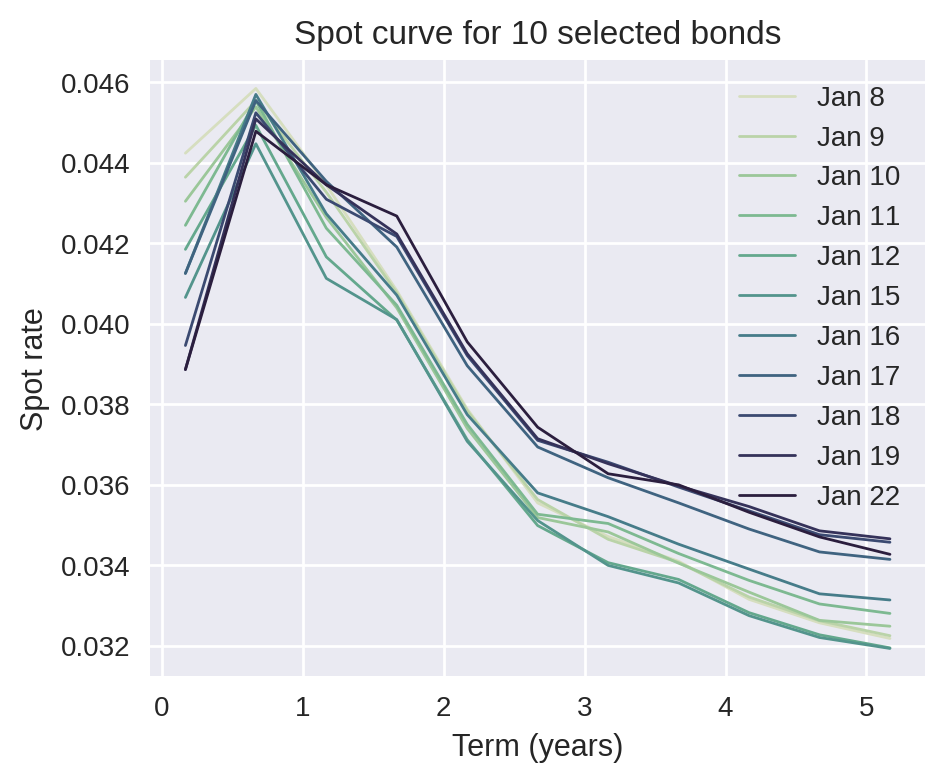

In [12]:
# plot the spot curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
plt.style.use('seaborn')
plt.figure(figsize=(5,4), dpi=200)
for i, rates in enumerate(all_rates):
    plt.plot(terms, rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Spot rate")
plt.title("Spot curve for 10 selected bonds")
plt.legend()
plt.show()


 Write a pseudo-code for how you would derive the 1-year forward curve with terms ranging from 2-5 years from your chosen bonds in part 2 (I.e., a curve with the first point being the 1yr-1yr forward rate and the last point being the 1yr-4yr rate). Then provide a well-labeled plot with a forward curve corresponding to each day of data superimposed on-top of each other

In [13]:
print(terms)

[0.16666666666666666, 0.6666666666666666, 1.1666666666666667, 1.6666666666666667, 2.1666666666666665, 2.6666666666666665, 3.1666666666666665, 3.6666666666666665, 4.166666666666667, 4.666666666666667, 5.166666666666667]


In [14]:
def get_forward_rate(spot_rate, terms, base_index, forward_indices, t0):
    # base index is the term you calculate forward rate on
    # forward indices are the term you will calculate the forward rate
    r_b = spot_rate[base_index]
    t_b = terms[base_index]
    forward_rates = []
    for i in forward_indices:
      r_a = spot_rate[i]
      t_a = terms[i]
      # f_r = (1+r_a)**t_a/(1+r_b)**t_b - 1
      # print(r_b, t_b, r_a, t_a, t0)
      f_r = (r_a*(t_a-t0)-r_b*(t_b-t0)) / (t_a-t_b)
      forward_rates.append(f_r)
    return forward_rates

In [15]:
forward_rates = []
base_index = 2
forward_indices = [4,6,8,10]
t0=terms[0]
for i, spot_rate in enumerate(all_rates):
  forward_rate = get_forward_rate(spot_rate, terms, base_index, forward_indices, t0)
  forward_rates.append(forward_rate)
  print(f"forward rate for {days[i]}: {forward_rate}")

forward rate for Jan 8: [0.03231448089578559, 0.030350061845077367, 0.029724158931888484, 0.029367329617141634]
forward rate for Jan 9: [0.03240196504496983, 0.030335306447595942, 0.029860354781647492, 0.029497680117849992]
forward rate for Jan 10: [0.03216152987937935, 0.030922180094540102, 0.030232173087833335, 0.029948381885403323]
forward rate for Jan 11: [0.03263021093889806, 0.03137126603434965, 0.030709438907045444, 0.030412739977377423]
forward rate for Jan 12: [0.032581825750591015, 0.03026808455043082, 0.029878917912663356, 0.029520643110757264]
forward rate for Jan 15: [0.033032727264268126, 0.030432817763514013, 0.0299569906099494, 0.029636517203865776]
forward rate for Jan 16: [0.03275471299743043, 0.03144692966286853, 0.030964723340588956, 0.0307409255289198]
forward rate for Jan 17: [0.034379171928793015, 0.032493524242639175, 0.03202320750879229, 0.031800058059795945]
forward rate for Jan 18: [0.03532788908757061, 0.03329610201349365, 0.03277348626708698, 0.032443897977

<ipython-input-16-0febc2e526b8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


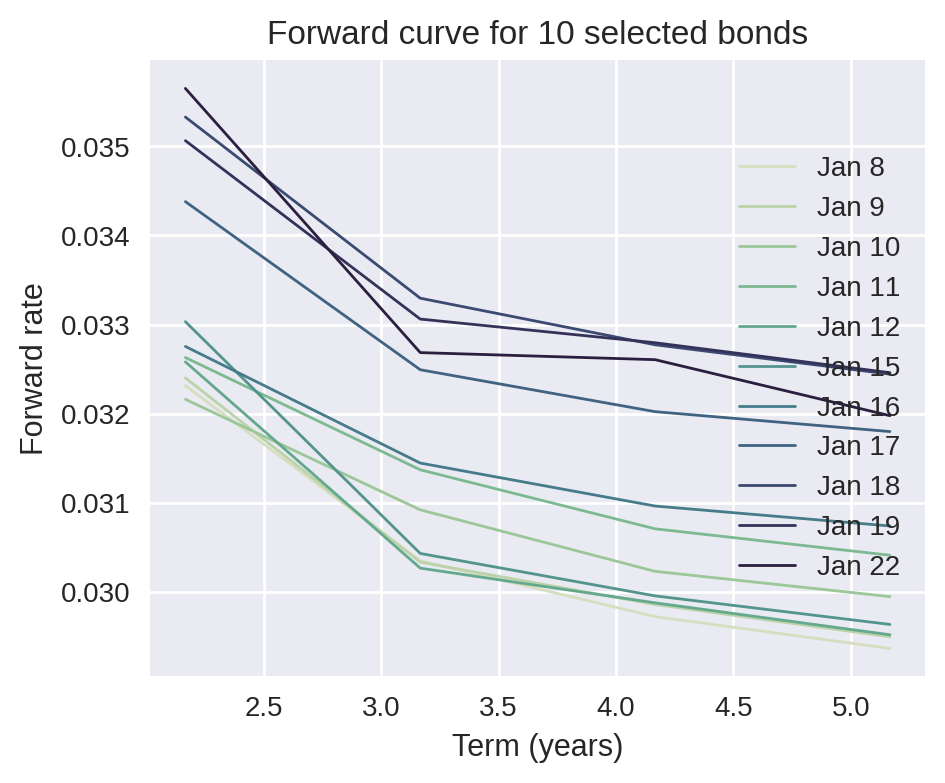

In [16]:
# plot the spot curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
plt.style.use('seaborn')
plt.figure(figsize=(5,4), dpi=200)
for i, rates in enumerate(forward_rates):
    plt.plot([terms[k] for k in forward_indices], rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Forward rate")
plt.title("Forward curve for 10 selected bonds")
plt.legend(loc='right')
plt.show()

Calculate two covariance matrices for the time series of daily log-returns of yield, and forward rates (no spot rates)

In [17]:
import math
ytms = [list(ytm) for ytm in ytms]
print(ytms)
print(forward_rates)

[[0.02239142413464924, 0.023034956556880228, 0.02180741990372452, 0.020616580049447508, 0.019158024605142182, 0.01784606637030912, 0.01744673666782851, 0.01725883186557344, 0.01685785536159601, 0.016550086541074833, 0.01642003834619734], [0.022089761570827475, 0.022881099100919254, 0.0217179502093997, 0.020585267406659932, 0.019133781288310236, 0.01788668320926386, 0.017412258011816922, 0.017244155712701686, 0.01688347964884277, 0.01657320248347687, 0.016451010185922432], [0.021788129226145585, 0.02280418202939546, 0.021404949667478294, 0.020397457883587194, 0.018915701428178104, 0.01766339447171274, 0.017498468032954316, 0.017229481045270528, 0.016934743564158857, 0.01657320248347687, 0.01655431567455028], [0.02148652709606341, 0.022881099100919254, 0.021270874816505102, 0.020428751576292557, 0.01896414651645306, 0.01770397354415336, 0.017601978962624745, 0.01734691998969035, 0.017075824888933264, 0.016769875076064002, 0.01670946462062274], [0.021184955176040413, 0.022573477426522607,

In [18]:
def rate_to_log_return(rates):
  # first transpose the rates
  rates_np = np.array(rates).T
  log_return = []
  for rate in rates_np:
    logr0 = math.log(rate[0])
    #print(logr0, rate)
    temp = [math.log(r) - logr0 for r in rate[1:]]
    log_return.append(temp)

  return log_return

def compute_covariance(log_return):
  log_return = np.array(log_return)
  return np.cov(log_return)

In [19]:
ytms_log_return = rate_to_log_return(ytms)
forward_rates_log_return = rate_to_log_return(forward_rates)

In [20]:
print(len(ytms_log_return))
# ignore the half years as we want X1...X5, hence
ytms_log_return = [ytms_log_return[2*i] for i in range(len(ytms_log_return)//2)]
print(len(ytms_log_return))

11
5


In [21]:
print(len(forward_rates_log_return))

4


In [22]:
ytms_log_return_cov = compute_covariance(ytms_log_return)
print(ytms_log_return_cov)

[[ 0.00167588 -0.00019745 -0.00074479 -0.00077016 -0.00096259]
 [-0.00019745  0.0003656   0.00039103  0.00043735  0.00047131]
 [-0.00074479  0.00039103  0.00062137  0.00066061  0.0007572 ]
 [-0.00077016  0.00043735  0.00066061  0.00076795  0.00085853]
 [-0.00096259  0.00047131  0.0007572   0.00085853  0.00097434]]


In [23]:
forward_rates_log_return_cov = compute_covariance(forward_rates_log_return)
print(forward_rates_log_return_cov)

[[0.00159231 0.00132502 0.0014937  0.00144239]
 [0.00132502 0.00135352 0.00145232 0.00144439]
 [0.0014937  0.00145232 0.00158525 0.00156347]
 [0.00144239 0.00144439 0.00156347 0.00155386]]


 Calculate the eigenvalues and eigenvectors of both covariance matrice

In [24]:
def top5eigen(cov_matrix):
  # Calculate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors by largest eigenvalue
  idx = eigenvalues.argsort()[::-1]   # indices for sorting in descending order
  sorted_eigenvalues = eigenvalues[idx]
  sorted_eigenvectors = eigenvectors[:,idx]

  # Take the first 5 (in this case, it's all of them since we only have 5)
  first_5_eigenvalues = sorted_eigenvalues[:5]
  first_5_eigenvectors = sorted_eigenvectors[:,:5]
  eigenvalues_sum = sum(eigenvalues)

  return first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum

In [25]:
first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum = top5eigen(ytms_log_return_cov)
print(f"Top 5 eigenvalues: {first_5_eigenvalues}")
print(f"Top 5 relative percentage {list(100*first_5_eigenvalues/eigenvalues_sum)} %")
print(f"Top 5 eigenvectors: {first_5_eigenvectors}")

Top 5 eigenvalues: [3.63369271e-03 7.17605039e-04 4.19864416e-05 1.12718186e-05
 5.83221572e-07]
Top 5 relative percentage [82.48757915111531, 16.290178397515074, 0.9531240528745177, 0.25587882667455514, 0.013239571820562006] %
Top 5 eigenvectors: [[-0.59255704 -0.74496199  0.15960604 -0.24497876  0.09175567]
 [ 0.21448917 -0.50437852 -0.511304    0.65916336 -0.0605688 ]
 [ 0.39695066 -0.20861168 -0.53196208 -0.71087853 -0.10285622]
 [ 0.43507088 -0.30470655  0.56234333  0.00324362 -0.63374025]
 [ 0.50597831 -0.23295712  0.33746179 -0.01141313  0.75875306]]


In [26]:
first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum = top5eigen(forward_rates_log_return_cov)
print(f"Top 5 eigenvalues: {first_5_eigenvalues}")
print(f"Top 5 relative percentage {list(100*first_5_eigenvalues/eigenvalues_sum)} %")
print(f"Top 5 eigenvectors: {first_5_eigenvectors}")

Top 5 eigenvalues: [5.88848181e-03 1.87659054e-04 6.00974149e-06 2.78555583e-06]
Top 5 relative percentage [96.77146405651925, 3.0839937973071576, 0.09876424882829676, 0.0457778973452898] %
Top 5 eigenvectors: [[ 0.49736147  0.84983994 -0.14087801  0.1027474 ]
 [ 0.47361295 -0.39302361 -0.78023488 -0.11160975]
 [ 0.51781125 -0.13924896  0.48343956 -0.69193021]
 [ 0.51009199 -0.32235732  0.37104326  0.70584617]]
